<a href="https://colab.research.google.com/github/sahil-ansari-15/Sales-Prediction-using-Customer-s-past-behaviour/blob/main/Sales%20Prediction%20using%20Customer's%20past%20behaviour.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ===============================================
# Sales Prediction using Customer's past behaviour
# ===============================================

**Problem statement**:<br> Predict whether a customer will purchase from the store given data about customer’s information and past behaviour.

 

The train.csv file contains the training dataset that has the following variables. You may use this data for the purpose of training and validating your model.

 
<br>

**Target variable**<br>
PURCHASE - Indicates whether a customer purchases (Yes/No) a product when approached by the store.

 
<br>

**Other variables**:<br>
ID - Unique identifier of a customer<br>
STATE - Customer’s state of residence<br>
AGE - Customer’s age<br>
OCCUPATION - Customer’s occupation<br>
INCOME_GROUP - Customer’s income band<br>
CUSTOMER_SINCE - Year in which the customer made the first purchase at the store<br>
LOYALTY_PROGRAM - Is the customer enrolled for the loyalty program? (Yes/No)<br>
PAST_PURCHASE - Total amount of past purchase from the same store
 
<br>

**Evaluation criteria**:<br>
F1 score which is the harmonic mean of precision and recall. You are expected to predict using the data in the test.csv file and send the prediction in the format mentioned in sample_submission.csv.

In [1]:
# Imporing required libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore') # ignore warnings

# Preparing Setup
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# set seaborn style
sns.set_style('whitegrid')

# setting randomness in notebook
np.random.seed(0)

In [2]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [3]:
print(train_df.shape)
train_df.head()

(150000, 9)


,ID,STATE,AGE,OCCUPATION,INCOME_GROUP,CUSTOMER_SINCE,LOYALTY_PROGRAM,PAST_PURCHASE,PURCHASE
0,1,Uttar Pradesh,28,,Low,2018,No,4937,No
1,2,Madhya Pradesh,27,Salaried,Low,2018,No,10834,No
2,3,West Bengal,62,,High,2013,NaN,8610,Yes
3,4,Tamil Nadu,27,Salaried,Low,2018,No,14374,Yes
4,5,Uttar Pradesh,40,Self employed,High,2015,No,13158,No


In [4]:
print(test_df.shape)
test_df.head()

(50000, 8)


,ID,STATE,AGE,OCCUPATION,INCOME_GROUP,CUSTOMER_SINCE,LOYALTY_PROGRAM,PAST_PURCHASE
0,150001,Maharashtra,50,Self employed,Medium,2018,No,12746
1,150002,Maharashtra,58,Self employed,High,2011,Yes,12277
2,150003,Andaman and Nicobar Islands,30,Salaried,Low,2017,Yes,16401
3,150004,Mizoram,27,Salaried,Low,2018,Yes,9665
4,150005,Uttar Pradesh,67,,Medium,2014,No,15724


## Exploratory Data Analysis (EDA) & Data wrangling (Featuring Engineering)

### Training Dataset : train_df

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   ID               150000 non-null  int64 
 1   STATE            150000 non-null  object
 2   AGE              150000 non-null  int64 
 3   OCCUPATION       150000 non-null  object
 4   INCOME_GROUP     150000 non-null  object
 5   CUSTOMER_SINCE   150000 non-null  int64 
 6   LOYALTY_PROGRAM  132176 non-null  object
 7   PAST_PURCHASE    150000 non-null  int64 
 8   PURCHASE         150000 non-null  object
dtypes: int64(4), object(5)
memory usage: 10.3+ MB


In [6]:
train_df.isnull().sum()

ID                     0
STATE                  0
AGE                    0
OCCUPATION             0
INCOME_GROUP           0
CUSTOMER_SINCE         0
LOYALTY_PROGRAM    17824
PAST_PURCHASE          0
PURCHASE               0
dtype: int64

In [7]:
train_df.iloc[0,3]

' '

In [8]:
# for col in list(train_df.columns)[1:]:
#     print(train_df[col].value_counts(),'\n','='*80)

In [9]:
print('          Columns having white space/ null - missing values          \n','='*70)
for col in list(train_df.columns):
    if ' ' in train_df[col].value_counts():
        miss_val = train_df[col].value_counts()[' ']
        print(col,'\n{} white space/ missing values'.format(miss_val))
        print(round((miss_val/len(train_df))*100,2),' %\n')
miss_val = train_df['LOYALTY_PROGRAM'].isnull().sum()
print('LOYALTY_PROGRAM\n','{} null/ missing values'.format(miss_val))
print(round((miss_val/len(train_df))*100,2),' %')

          Columns having white space/ null - missing values          
STATE 
1842 white space/ missing values
1.23  %

OCCUPATION 
42777 white space/ missing values
28.52  %

INCOME_GROUP 
3437 white space/ missing values
2.29  %

LOYALTY_PROGRAM
 17824 null/ missing values
11.88  %


In [10]:
train_df.replace({" ": "unknown", np.nan: "unknown"}, inplace = True)

train_df['PURCHASE'].replace(['Yes', 'No'], [1, 0], inplace = True)

In [11]:
print('          Columns having white space/ null - missing values          \n','='*70)
for col in list(train_df.columns):
    if ' ' in train_df[col].value_counts():
        miss_val = train_df[col].value_counts()[' ']
        print(col,'\n{} white space/ missing values'.format(miss_val))
        print(round((miss_val/len(train_df))*100,2),' %\n')
miss_val = train_df['LOYALTY_PROGRAM'].isnull().sum()
print('LOYALTY_PROGRAM\n','{} null/ missing values'.format(miss_val))
print(round((miss_val/len(train_df))*100,2),' %')

          Columns having white space/ null - missing values          
LOYALTY_PROGRAM
 0 null/ missing values
0.0  %


In [12]:
train_df.head(20)

,ID,STATE,AGE,OCCUPATION,INCOME_GROUP,CUSTOMER_SINCE,LOYALTY_PROGRAM,PAST_PURCHASE,PURCHASE
0,1,Uttar Pradesh,28,unknown,Low,2018,No,4937,0
1,2,Madhya Pradesh,27,Salaried,Low,2018,No,10834,0
2,3,West Bengal,62,unknown,High,2013,unknown,8610,1
3,4,Tamil Nadu,27,Salaried,Low,2018,No,14374,1
4,5,Uttar Pradesh,40,Self employed,High,2015,No,13158,0
5,6,Maharashtra,28,Salaried,Low,2018,No,5159,0
6,7,Tamil Nadu,68,unknown,High,2010,unknown,12780,1
7,8,Maharashtra,45,Self employed,Medium,2018,No,5018,0
8,9,West Bengal,56,Self employed,Medium,2014,Yes,7238,0
9,10,Tamil Nadu,67,unknown,High,2010,Yes,25120,1


### Handling Categorical Data
One can find many ways to handle categorical data. Some of them categorical data are,

**Nominal data** --> data are not in any order --> **OneHotEncoder**

**Ordinal data** --> data are in order --> **LabelEncoder**

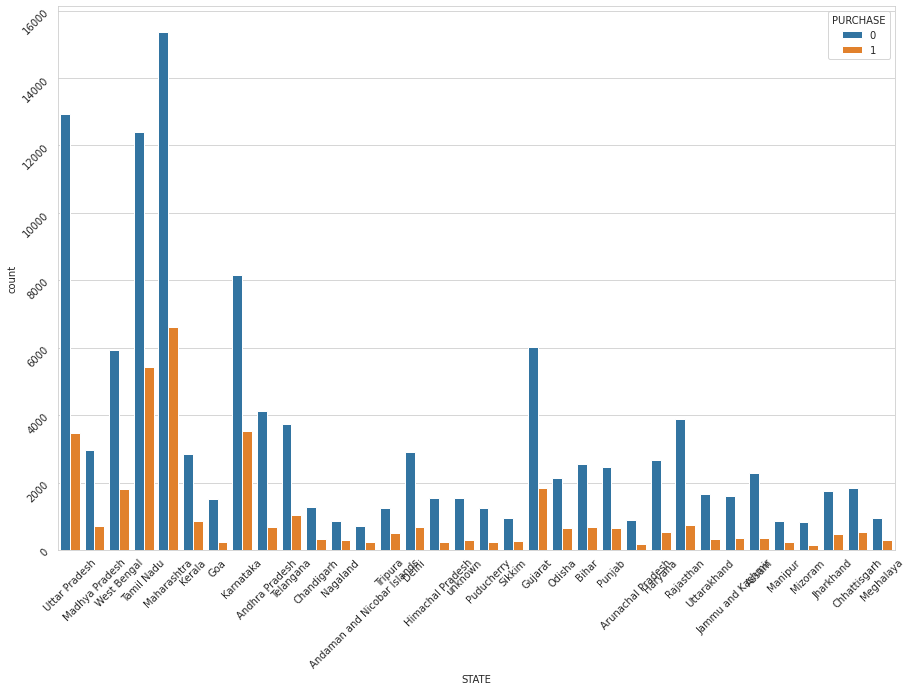

In [13]:
plt.figure(figsize=(15, 10))
sns.countplot(x='STATE', data=train_df, hue='PURCHASE')
plt.tick_params(labelrotation=45)
plt.show()

<Figure size 1080x1080 with 0 Axes>

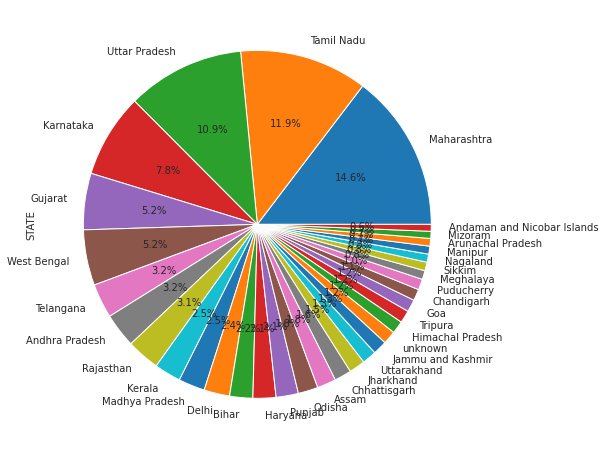

<Figure size 1080x1080 with 0 Axes>

In [14]:
plt.figure(figsize=(8, 8))
train_df['STATE'].value_counts().plot.pie(autopct="%.1f%%")
plt.figure(figsize=[15,15])

In [15]:
train_df['STATE'].value_counts(normalize=True)

Maharashtra                    0.146453
Tamil Nadu                     0.118907
Uttar Pradesh                  0.109333
Karnataka                      0.077927
Gujarat                        0.052427
West Bengal                    0.051673
Telangana                      0.031887
Andhra Pradesh                 0.031873
Rajasthan                      0.030807
Kerala                         0.024787
Madhya Pradesh                 0.024533
Delhi                          0.023813
Bihar                          0.021500
Haryana                        0.021313
Punjab                         0.020753
Odisha                         0.018487
Assam                          0.017587
Chhattisgarh                   0.015773
Jharkhand                      0.014947
Uttarakhand                    0.013227
Jammu and Kashmir              0.013080
unknown                        0.012280
Himachal Pradesh               0.011753
Tripura                        0.011567
Goa                            0.011567


In [16]:
# merging labels if they are less than threshold (< 0.05)
counts = train_df['STATE'].value_counts(normalize=True)
labels_less_then_threshold = counts[counts < 0.05].index.to_list()
where_to_replace = train_df['STATE'].isin(labels_less_then_threshold).copy()
train_df.loc[where_to_replace, 'STATE'] = 'merged'
print(labels_less_then_threshold)

['Telangana', 'Andhra Pradesh', 'Rajasthan', 'Kerala', 'Madhya Pradesh', 'Delhi', 'Bihar', 'Haryana', 'Punjab', 'Odisha', 'Assam', 'Chhattisgarh', 'Jharkhand', 'Uttarakhand', 'Jammu and Kashmir', 'unknown', 'Himachal Pradesh', 'Tripura', 'Goa', 'Chandigarh', 'Puducherry', 'Meghalaya', 'Sikkim', 'Nagaland', 'Manipur', 'Arunachal Pradesh', 'Mizoram', 'Andaman and Nicobar Islands']


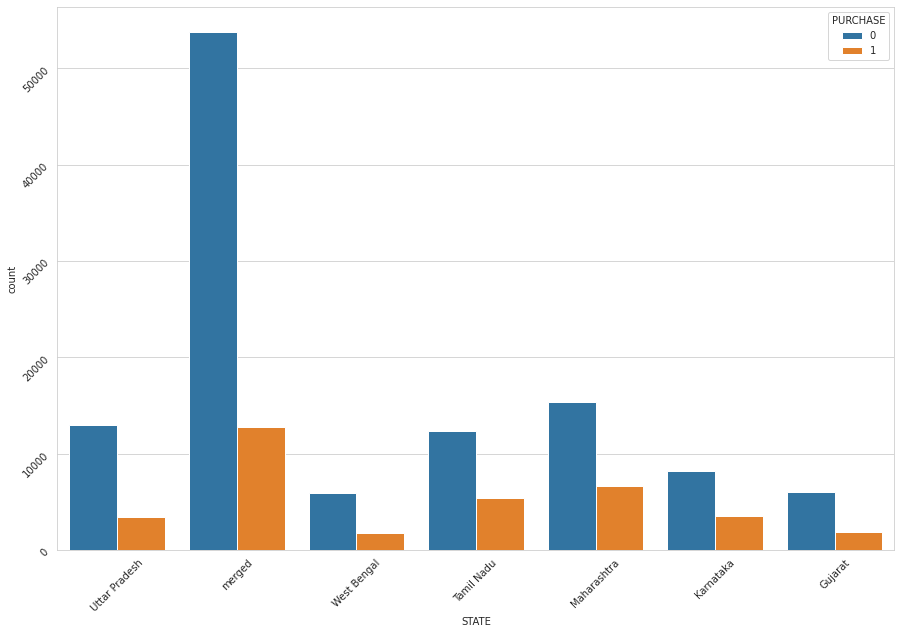

In [17]:
plt.figure(figsize=(15, 10))
sns.countplot(x='STATE', data=train_df, hue='PURCHASE')
plt.tick_params(labelrotation=45)
plt.show()

<Figure size 1080x1080 with 0 Axes>

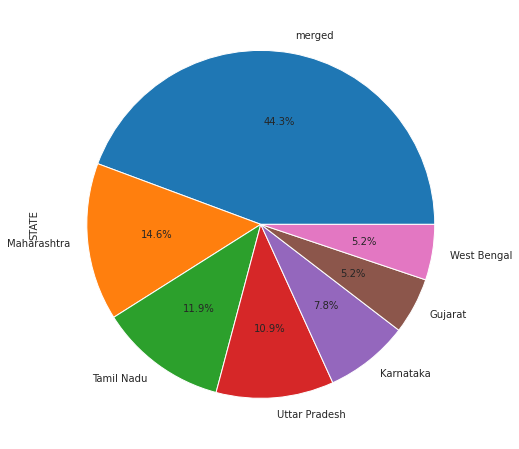

<Figure size 1080x1080 with 0 Axes>

In [18]:
plt.figure(figsize=(8, 8))
train_df['STATE'].value_counts().plot.pie(autopct="%.1f%%")
plt.figure(figsize=[15,15])

In [19]:
from sklearn.preprocessing import OneHotEncoder
One_Hot_Encoder = OneHotEncoder()

# As STATE is Nominal Categorical data we will perform OneHotEncoding
STATE = pd.DataFrame(One_Hot_Encoder.fit_transform(train_df[["STATE"]]).toarray())
STATE.columns = One_Hot_Encoder.get_feature_names(['STATE'])
STATE.head()

,STATE_Gujarat,STATE_Karnataka,STATE_Maharashtra,STATE_Tamil Nadu,STATE_Uttar Pradesh,STATE_West Bengal,STATE_merged
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0


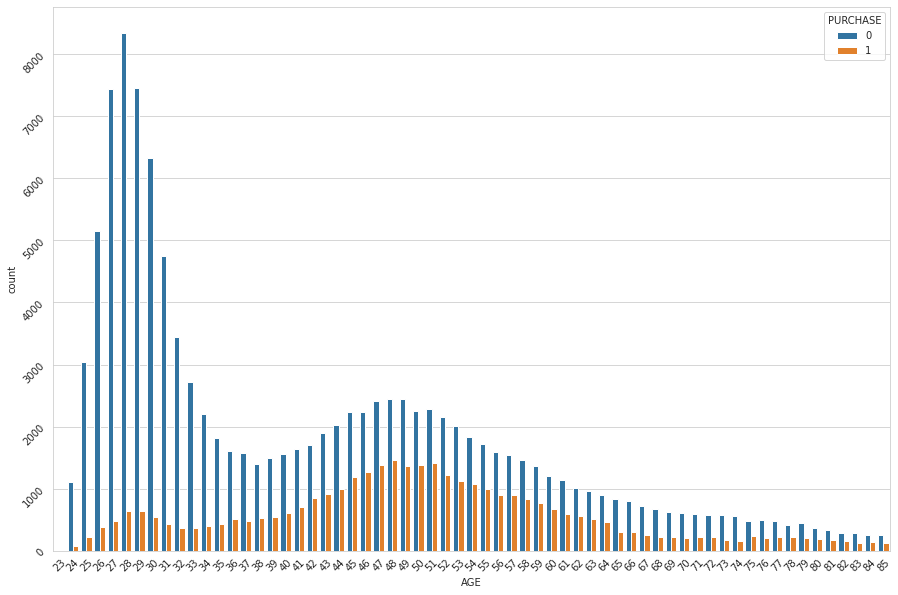

In [20]:
plt.figure(figsize=(15, 10))
sns.countplot(x='AGE', data=train_df, hue='PURCHASE')
plt.tick_params(labelrotation=45)
plt.show()

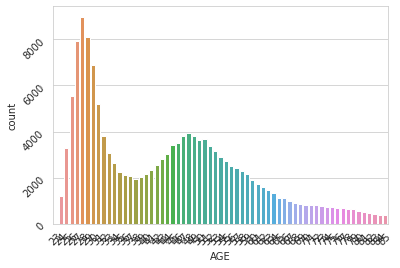

In [21]:
#plt.figure(figsize=(15, 10))
sns.countplot(x='AGE', data=train_df)
plt.tick_params(labelrotation=45)
plt.show()

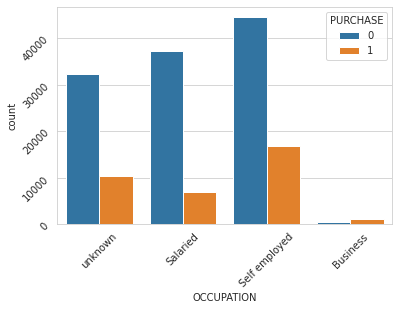

In [22]:
sns.countplot(x='OCCUPATION', data=train_df, hue='PURCHASE')
plt.tick_params(labelrotation=45)
plt.show()

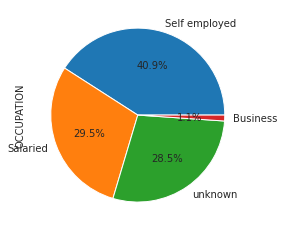

In [23]:
train_df['OCCUPATION'].value_counts().plot.pie(autopct="%.1f%%")
plt.show()

In [24]:
# As OCCUPATION is Nominal Categorical data we will perform OneHotEncoding
OCCUPATION = pd.DataFrame(One_Hot_Encoder.fit_transform(train_df[["OCCUPATION"]]).toarray())
OCCUPATION.columns = One_Hot_Encoder.get_feature_names(['OCCUPATION'])
OCCUPATION.head()

,OCCUPATION_Business,OCCUPATION_Salaried,OCCUPATION_Self employed,OCCUPATION_unknown
0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0
4,0.0,0.0,1.0,0.0


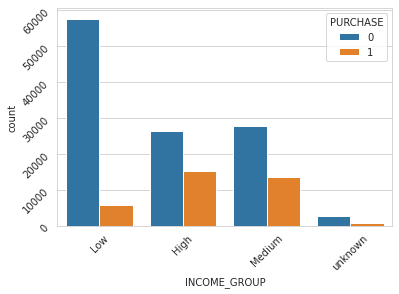

In [25]:
sns.countplot(x='INCOME_GROUP', data=train_df, hue='PURCHASE')
plt.tick_params(labelrotation=45)
plt.show()

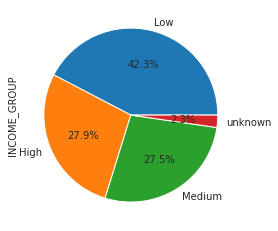

In [26]:
train_df['INCOME_GROUP'].value_counts().plot.pie(autopct="%.1f%%")
plt.show()

In [27]:
# As INCOME_GROUP is Nominal Categorical data we will perform OneHotEncoding
INCOME_GROUP = pd.DataFrame(One_Hot_Encoder.fit_transform(train_df[["INCOME_GROUP"]]).toarray())
INCOME_GROUP.columns = One_Hot_Encoder.get_feature_names(['INCOME_GROUP'])
INCOME_GROUP.head()

,INCOME_GROUP_High,INCOME_GROUP_Low,INCOME_GROUP_Medium,INCOME_GROUP_unknown
0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0


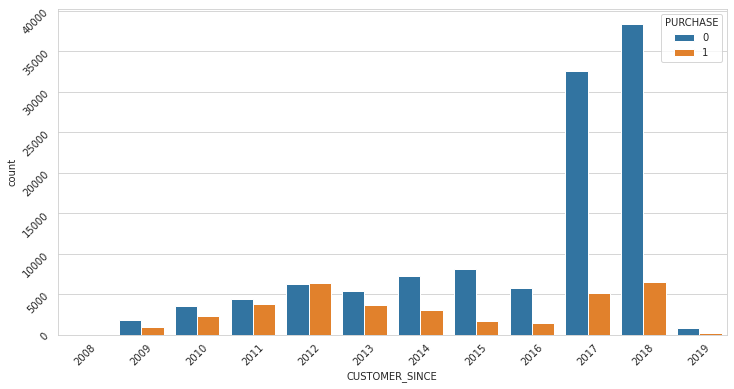

In [28]:
plt.figure(figsize=(12, 6))
sns.countplot(x='CUSTOMER_SINCE', data=train_df, hue='PURCHASE')
plt.tick_params(labelrotation=45)
plt.show()

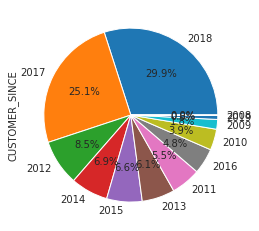

In [29]:
train_df['CUSTOMER_SINCE'].value_counts().plot.pie(autopct="%.1f%%")
plt.show()

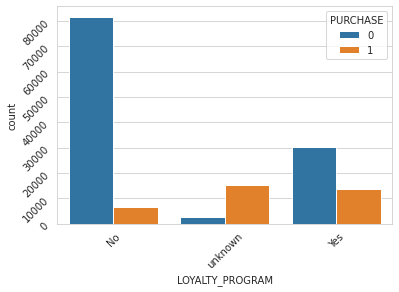

In [30]:
sns.countplot(x='LOYALTY_PROGRAM', data=train_df, hue='PURCHASE')
plt.tick_params(labelrotation=45)
plt.show()

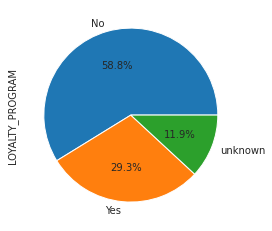

In [31]:
train_df['LOYALTY_PROGRAM'].value_counts().plot.pie(autopct="%.1f%%")
plt.show()

In [32]:
# As LOYALTY_PROGRAM is Nominal Categorical data we will perform OneHotEncoding
LOYALTY_PROGRAM = pd.DataFrame(One_Hot_Encoder.fit_transform(train_df[["LOYALTY_PROGRAM"]]).toarray())
LOYALTY_PROGRAM.columns = One_Hot_Encoder.get_feature_names(['LOYALTY_PROGRAM'])
LOYALTY_PROGRAM.head()

,LOYALTY_PROGRAM_No,LOYALTY_PROGRAM_Yes,LOYALTY_PROGRAM_unknown
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,0.0,0.0,1.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0


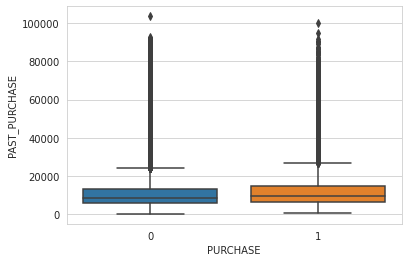

In [33]:
sns.boxplot(x='PURCHASE', y='PAST_PURCHASE', data=train_df)

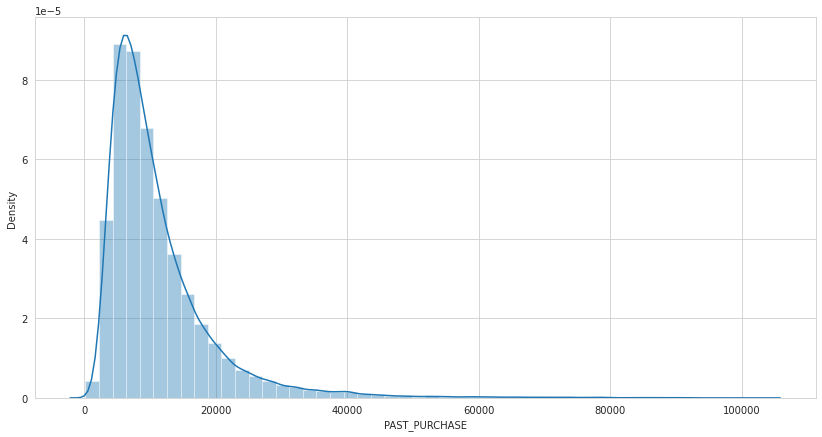

In [34]:
plt.figure(figsize=(14, 7))
sns.distplot(train_df.PAST_PURCHASE)
plt.show()

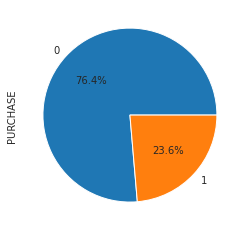

In [35]:
train_df['PURCHASE'].value_counts().plot.pie(autopct="%.1f%%")
plt.show()

In [36]:
train_df.head()

,ID,STATE,AGE,OCCUPATION,INCOME_GROUP,CUSTOMER_SINCE,LOYALTY_PROGRAM,PAST_PURCHASE,PURCHASE
0,1,Uttar Pradesh,28,unknown,Low,2018,No,4937,0
1,2,merged,27,Salaried,Low,2018,No,10834,0
2,3,West Bengal,62,unknown,High,2013,unknown,8610,1
3,4,Tamil Nadu,27,Salaried,Low,2018,No,14374,1
4,5,Uttar Pradesh,40,Self employed,High,2015,No,13158,0


In [37]:
# Concatenate dataframe --> train_df + STATE + OCCUPATION + INCOME_GROUP + LOYALTY_PROGRAM
train_df = pd.concat([train_df, STATE, OCCUPATION, INCOME_GROUP, LOYALTY_PROGRAM], axis = 1)

In [38]:
print(train_df.shape)
train_df.head()

(150000, 27)


,ID,STATE,AGE,OCCUPATION,INCOME_GROUP,CUSTOMER_SINCE,LOYALTY_PROGRAM,PAST_PURCHASE,PURCHASE,STATE_Gujarat,STATE_Karnataka,STATE_Maharashtra,STATE_Tamil Nadu,STATE_Uttar Pradesh,STATE_West Bengal,STATE_merged,OCCUPATION_Business,OCCUPATION_Salaried,OCCUPATION_Self employed,OCCUPATION_unknown,INCOME_GROUP_High,INCOME_GROUP_Low,INCOME_GROUP_Medium,INCOME_GROUP_unknown,LOYALTY_PROGRAM_No,LOYALTY_PROGRAM_Yes,LOYALTY_PROGRAM_unknown
0,1,Uttar Pradesh,28,unknown,Low,2018,No,4937,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,2,merged,27,Salaried,Low,2018,No,10834,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,3,West Bengal,62,unknown,High,2013,unknown,8610,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,4,Tamil Nadu,27,Salaried,Low,2018,No,14374,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,5,Uttar Pradesh,40,Self employed,High,2015,No,13158,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [39]:
print(train_df.shape)
train_df.drop(['ID', 'STATE', 'OCCUPATION', 'INCOME_GROUP', 'LOYALTY_PROGRAM'], axis = 1, inplace = True)
train_df.head()

(150000, 27)


,AGE,CUSTOMER_SINCE,PAST_PURCHASE,PURCHASE,STATE_Gujarat,STATE_Karnataka,STATE_Maharashtra,STATE_Tamil Nadu,STATE_Uttar Pradesh,STATE_West Bengal,STATE_merged,OCCUPATION_Business,OCCUPATION_Salaried,OCCUPATION_Self employed,OCCUPATION_unknown,INCOME_GROUP_High,INCOME_GROUP_Low,INCOME_GROUP_Medium,INCOME_GROUP_unknown,LOYALTY_PROGRAM_No,LOYALTY_PROGRAM_Yes,LOYALTY_PROGRAM_unknown
0,28,2018,4937,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,27,2018,10834,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,62,2013,8610,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,27,2018,14374,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,40,2015,13158,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [40]:
cols = [col for col in train_df if col != 'PURCHASE'] + ['PURCHASE']
train_df = train_df[cols]

In [41]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

train_df['AGE'] = scaler.fit_transform(np.array(train_df['AGE']).reshape(-1, 1))
train_df['CUSTOMER_SINCE'] = scaler.fit_transform(np.array(train_df['CUSTOMER_SINCE']).reshape(-1, 1))
train_df['PAST_PURCHASE'] = scaler.fit_transform(np.array(train_df['PAST_PURCHASE']).reshape(-1, 1))

In [42]:
train_df.head()

,AGE,CUSTOMER_SINCE,PAST_PURCHASE,STATE_Gujarat,STATE_Karnataka,STATE_Maharashtra,STATE_Tamil Nadu,STATE_Uttar Pradesh,STATE_West Bengal,STATE_merged,OCCUPATION_Business,OCCUPATION_Salaried,OCCUPATION_Self employed,OCCUPATION_unknown,INCOME_GROUP_High,INCOME_GROUP_Low,INCOME_GROUP_Medium,INCOME_GROUP_unknown,LOYALTY_PROGRAM_No,LOYALTY_PROGRAM_Yes,LOYALTY_PROGRAM_unknown,PURCHASE
0,-1.065921,0.927914,-0.745697,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0
1,-1.133360,0.927914,-0.048499,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0
2,1.227012,-0.933842,-0.311441,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1
3,-1.133360,0.927914,0.370033,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1
4,-0.256651,-0.189140,0.226266,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0


In [43]:
train_df_x = train_df.drop("PURCHASE", axis=1)
train_df_y = train_df['PURCHASE']

## Principle Component Analysis(PCA)

In [44]:
from sklearn.decomposition import PCA

In [45]:
pca = PCA(n_components=8)

In [46]:
pca.fit(train_df_x)

PCA(copy=True, iterated_power='auto', n_components=8, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [47]:
train_df_x_pca = pca.transform(train_df_x)

In [48]:
train_df_x.shape

(150000, 21)

In [49]:
train_df_x_pca.shape

(150000, 8)

### Testing Dataset : test_df

In [50]:
print('          Columns having white space/ null - missing values          \n','='*70)
for col in list(test_df.columns):
    if ' ' in test_df[col].value_counts():
        miss_val = test_df[col].value_counts()[' ']
        print(col,'\n{} white space/ missing values'.format(miss_val))
        print(round((miss_val/len(train_df))*100,2),' %\n')
miss_val = test_df['LOYALTY_PROGRAM'].isnull().sum()
print('LOYALTY_PROGRAM\n','{} null/ missing values'.format(miss_val))
print(round((miss_val/len(train_df))*100,2),' %')

          Columns having white space/ null - missing values          
STATE 
576 white space/ missing values
0.38  %

OCCUPATION 
14380 white space/ missing values
9.59  %

INCOME_GROUP 
1118 white space/ missing values
0.75  %

LOYALTY_PROGRAM
 6004 null/ missing values
4.0  %


In [51]:
test_df.replace({" ": "unknown", np.nan: "unknown"}, inplace = True)

print('          Columns having white space/ null - missing values          \n','='*70)
for col in list(test_df.columns):
    if ' ' in test_df[col].value_counts():
        miss_val = test_df[col].value_counts()[' ']
        print(col,'\n{} white space/ missing values'.format(miss_val))
        print(round((miss_val/len(test_df))*100,2),' %\n')
miss_val = test_df['LOYALTY_PROGRAM'].isnull().sum()
print('LOYALTY_PROGRAM\n','{} null/ missing values'.format(miss_val))
print(round((miss_val/len(test_df))*100,2),' %')

          Columns having white space/ null - missing values          
LOYALTY_PROGRAM
 0 null/ missing values
0.0  %


In [52]:
# merging labels if they are less than threshold (< 0.05)
counts = test_df['STATE'].value_counts(normalize=True)
labels_less_then_threshold = counts[counts < 0.05].index.to_list()
where_to_replace = test_df['STATE'].isin(labels_less_then_threshold).copy()
test_df.loc[where_to_replace, 'STATE'] = 'merged'

# As STATE is Nominal Categorical data we will perform OneHotEncoding
STATE = pd.DataFrame(One_Hot_Encoder.fit_transform(test_df[["STATE"]]).toarray())
STATE.columns = One_Hot_Encoder.get_feature_names(['STATE'])

# As OCCUPATION is Nominal Categorical data we will perform OneHotEncoding
OCCUPATION = pd.DataFrame(One_Hot_Encoder.fit_transform(test_df[["OCCUPATION"]]).toarray())
OCCUPATION.columns = One_Hot_Encoder.get_feature_names(['OCCUPATION'])

# As INCOME_GROUP is Nominal Categorical data we will perform OneHotEncoding
INCOME_GROUP = pd.DataFrame(One_Hot_Encoder.fit_transform(test_df[["INCOME_GROUP"]]).toarray())
INCOME_GROUP.columns = One_Hot_Encoder.get_feature_names(['INCOME_GROUP'])

# As LOYALTY_PROGRAM is Nominal Categorical data we will perform OneHotEncoding
LOYALTY_PROGRAM = pd.DataFrame(One_Hot_Encoder.fit_transform(test_df[["LOYALTY_PROGRAM"]]).toarray())
LOYALTY_PROGRAM.columns = One_Hot_Encoder.get_feature_names(['LOYALTY_PROGRAM'])

# Concatenate dataframe --> test_df + STATE + OCCUPATION + INCOME_GROUP + LOYALTY_PROGRAM
test_df = pd.concat([test_df, STATE, OCCUPATION, INCOME_GROUP, LOYALTY_PROGRAM], axis = 1)

test_df.drop(['ID', 'STATE', 'OCCUPATION', 'INCOME_GROUP', 'LOYALTY_PROGRAM'], axis = 1, inplace = True)

test_df['AGE'] = scaler.fit_transform(np.array(test_df['AGE']).reshape(-1, 1))
test_df['CUSTOMER_SINCE'] = scaler.fit_transform(np.array(test_df['CUSTOMER_SINCE']).reshape(-1, 1))
test_df['PAST_PURCHASE'] = scaler.fit_transform(np.array(test_df['PAST_PURCHASE']).reshape(-1, 1))

test_df.head()

,AGE,CUSTOMER_SINCE,PAST_PURCHASE,STATE_Gujarat,STATE_Karnataka,STATE_Maharashtra,STATE_Tamil Nadu,STATE_Uttar Pradesh,STATE_West Bengal,STATE_merged,OCCUPATION_Business,OCCUPATION_Salaried,OCCUPATION_Self employed,OCCUPATION_unknown,INCOME_GROUP_High,INCOME_GROUP_Low,INCOME_GROUP_Medium,INCOME_GROUP_unknown,LOYALTY_PROGRAM_No,LOYALTY_PROGRAM_Yes,LOYALTY_PROGRAM_unknown
0,0.406710,0.937300,0.159191,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.945722,-1.658853,0.104780,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,-0.940820,0.566421,0.583225,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,-1.142949,0.937300,-0.198251,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,1.552110,-0.546216,0.504683,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [53]:
print('train_df Shape: ', train_df.shape)  
print('test_df Shape: ', test_df.shape)  

train_df Shape:  (150000, 22)
test_df Shape:  (50000, 21)


In [54]:
# Columns which are in train_df but not in test_df excluding PURCHASE(target variable), due to OneHotEncoding.
train_columns = train_df.columns.tolist()
test_columns = test_df.columns.tolist()

for col_name in train_columns:
    if (col_name not in test_columns) and (col_name != 'PURCHASE'):
        print(col_name)

There are no Columns which are in train_df but not in test_df excluding PURCHASE(target variable), due to OneHotEncoding.

In [55]:
# Columns which are in test_df but not in train_df excluding PURCHASE(target variable), due to OneHotEncoding.
train_columns = train_df.columns.tolist()
test_columns = test_df.columns.tolist()

for col_name in test_columns:
    if (col_name not in train_columns) and (col_name != 'PURCHASE'):
        print(col_name)

There are no Columns which are in test_df but not in train_df excluding PURCHASE(target variable), due to OneHotEncoding.

In [56]:
# arranging test_df columns in sequence of train_df columns.
test_df = test_df[train_columns[:-1]]
test_df.head()

,AGE,CUSTOMER_SINCE,PAST_PURCHASE,STATE_Gujarat,STATE_Karnataka,STATE_Maharashtra,STATE_Tamil Nadu,STATE_Uttar Pradesh,STATE_West Bengal,STATE_merged,OCCUPATION_Business,OCCUPATION_Salaried,OCCUPATION_Self employed,OCCUPATION_unknown,INCOME_GROUP_High,INCOME_GROUP_Low,INCOME_GROUP_Medium,INCOME_GROUP_unknown,LOYALTY_PROGRAM_No,LOYALTY_PROGRAM_Yes,LOYALTY_PROGRAM_unknown
0,0.406710,0.937300,0.159191,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.945722,-1.658853,0.104780,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,-0.940820,0.566421,0.583225,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,-1.142949,0.937300,-0.198251,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,1.552110,-0.546216,0.504683,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [57]:
#### PCA ####

test_df_x = test_df.copy()

pca = PCA(n_components=8)
pca.fit(test_df_x)
test_df_x_pca = pca.transform(test_df_x)
print(test_df_x.shape)
print(test_df_x_pca.shape)

(50000, 21)
(50000, 8)


## Feature Selection
Finding out the best feature which will contribute and have good relation with target variable. Following are some of the feature selection methods:

* heatmap

* feature_importance_

* SelectKBest

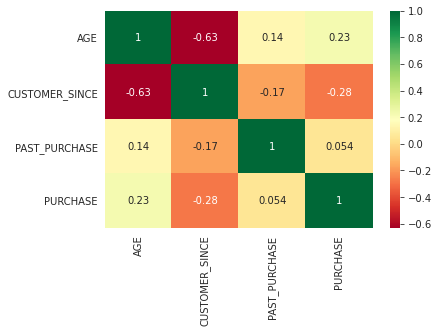

In [58]:
# Finds correlation between Independent and dependent attributes

#plt.figure(figsize = (6,6))
sns.heatmap(train_df[['AGE', 'CUSTOMER_SINCE', 'PAST_PURCHASE', 'PURCHASE']].corr(), annot = True, cmap = "RdYlGn")

plt.show()

[0.146991   0.04232723 0.37944409 0.00325196 0.0049487  0.0061631
 0.00578938 0.00500386 0.0034456  0.00645244 0.00176852 0.01462074
 0.00276187 0.00291321 0.00503921 0.0173745  0.00538874 0.00090292
 0.03572691 0.02695188 0.28273412]


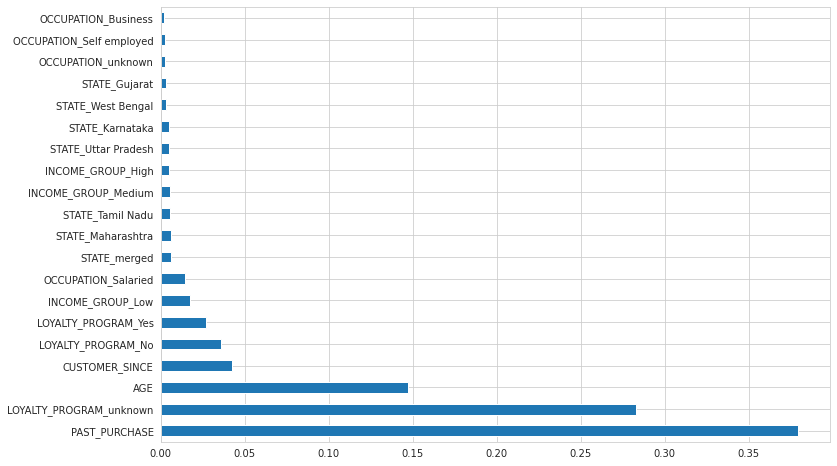

In [59]:
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()

x = train_df_x
y = train_df_y
# Alternate # x_train = train_df.loc[:, [col for col in train_df.columns if col != 'PURCHASE']]
selection.fit(x, y)

print(selection.feature_importances_)

# plot graph of feature importances for better visualization
plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=x.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

## ML Model(s) selection based on F1 score:
 Training & Testing different Classificaton models to check the F1 score to see which one is appropriate.

In [60]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train_df_x_pca, train_df_y, test_size = 0.2, random_state = 42)

In [61]:
from sklearn.ensemble import RandomForestClassifier
! pip install xgboost
from xgboost import XGBClassifier
! pip install lightgbm
import lightgbm as lgbm
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm

from sklearn.metrics import f1_score
from sklearn.model_selection import RandomizedSearchCV

### RandomForestClassifier

In [62]:
# RandomForestClassifier
RFC = RandomForestClassifier(random_state = 1).fit(x_train, y_train)
pred_RFC = RFC.predict(x_test)
score_RFC = f1_score(y_test, pred_RFC)
print('RandomForestClassifier: ',score_RFC)

RandomForestClassifier:  0.6107523535361394


### XGBClassifier

In [63]:
# XGBClassifier
XGBC = XGBClassifier(random_state = 1).fit(x_train, y_train)
pred_XGBC = XGBC.predict(x_test)
score_XGBC = f1_score(y_test, pred_XGBC)
print('XGBClassifier: ',score_XGBC)

XGBClassifier:  0.6146499530996845


### DecisionTreeClassifier

In [64]:
depth = []
score_DTC = [] 
for i in range(1,21):
    DTC = DecisionTreeClassifier(criterion="entropy", max_depth = i, random_state = 1).fit(x_train, y_train)
    pred_DTC = DTC.predict(x_test) 
    score = f1_score(y_test, pred_DTC)
    depth.append(i)
    score_DTC.append(score)
    
print('We get maximum f1_score {} for DecisionTreeClassifier when max_depth = {}.'.format
      (max(score_DTC), depth[score_DTC.index(max(score_DTC))])  )

We get maximum f1_score 0.6129692832764505 for DecisionTreeClassifier when max_depth = 7.


In [65]:
DTC = DecisionTreeClassifier(criterion="entropy", max_depth = 15, random_state = 1).fit(x_train, y_train)
pred_DTC = DTC.predict(x_test)
score_DTC = f1_score(y_test, pred_DTC)
print('DecisionTreeClassifier: ',score_DTC)

DecisionTreeClassifier:  0.6002044989775052


### KNeighborsClassifier

In [66]:
KNC = KNeighborsClassifier().fit(x_train, y_train)
pred_KNC = KNC.predict(x_test) 
score = f1_score(y_test, pred_DTC)
print('KNeighborsClassifier: ',score)

KNeighborsClassifier:  0.6002044989775052


In [67]:
n_neighbors = []
score_KNC = []
for i in range(3,10):
    KNC = KNeighborsClassifier(n_neighbors = i).fit(x_train, y_train)
    pred_KNC = KNC.predict(x_test) 
    score = f1_score(y_test, pred_DTC)
    n_neighbors.append(i)
    score_KNC.append(score)
    
print('We get maximum f1_score {} for KNeighborsClassifier when n_neighbors = {}.'.format
      (max(score_KNC), n_neighbors[score_KNC.index(max(score_KNC))])  )

We get maximum f1_score 0.6002044989775052 for KNeighborsClassifier when n_neighbors = 3.


In [68]:
KNC = KNeighborsClassifier(n_neighbors = 3).fit(x_train, y_train)
pred_KNC = KNC.predict(x_test) 
score = f1_score(y_test, pred_DTC)
print('KNeighborsClassifier: ',score)

KNeighborsClassifier:  0.6002044989775052


### LogisticRegression

In [69]:
# LogisticRegression
LogReg = LogisticRegression().fit(x_train, y_train)
pred_LogReg = LogReg.predict(x_test)
score_LogReg = f1_score(y_test, pred_LogReg)
print('LogisticRegression: ',score_LogReg)

LogisticRegression:  0.4197286856526817


In [70]:
# LogisticRegression
LogReg = LogisticRegression(C=0.01, solver='liblinear').fit(x_train, y_train)
pred_LogReg = LogReg.predict(x_test)
score_LogReg = f1_score(y_test, pred_LogReg)
print('LogisticRegression: ',score_LogReg)

LogisticRegression:  0.4163736362816698


### Support Vector Machine

In [71]:
# LogisticRegression
SVM = svm.SVC().fit(x_train, y_train)
pred_SVM = SVM.predict(x_test)
score_SVM = f1_score(y_test, pred_SVM)
print('LogisticRegression: ',score_SVM)

LogisticRegression:  0.6076319152820887


In [72]:
# LogisticRegression
SVM = svm.SVC(kernel='rbf').fit(x_train, y_train)
pred_SVM = SVM.predict(x_test)
score_SVM = f1_score(y_test, pred_SVM)
print('LogisticRegression: ',score_SVM)

LogisticRegression:  0.6076319152820887


### Selecting XGBClassifier for final prediction.

In [73]:
# XGBClassifier

Prediction = XGBC.predict(test_df_x_pca)

In [74]:
Prediction[:10]

array([0, 1, 0, 0, 0, 1, 0, 0, 0, 0])

Saving the Prediction as a excel file.

In [75]:
submission_df = pd.read_csv("sample_submission.csv")

In [76]:
submission_df.head()

,ID,PURCHASE
0,150001,NaN
1,150002,NaN
2,150003,NaN
3,150004,NaN
4,150005,NaN


In [77]:
submission_df.PURCHASE = Prediction

In [78]:
submission_df.tail()

,ID,PURCHASE
49995,199996,0
49996,199997,1
49997,199998,0
49998,199999,0
49999,200000,0


In [79]:
submission_df.to_csv('submission.csv', index = False)

**Conclusion**:<br>
We successfully predicted target variable(PURCHASE) for the test.csv and saved the prediction in submission.csv